# Linear Regression on Boston Housing Dataset

# Outline

1. Introduction
2. Import Required
    - Libraries
    - Dataset
3. Data Pre-Processing
4. Exploratory Data Analysis
    - Remarks
    - Remarks
    - Getting ready the data to train the model
5. Modelling and Prediction
    - Splitting the data into training sets
    - Training and Testing the Model
    - Model EValuation

# 1. Introduction
### The ***Boston Dataset*** is a collection of housing data gathered by the United States Census Bureau in Boston.

## 2. a. Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## 2. b. Import required Dataset

## Import
We'll load and comprehend the housing data from the **scikit-learn** library.

In [2]:
bostonDataset = load_boston()
# Dataset is imported in the form of Dictionary

C:\Users\Public\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [3]:
# Let's check what it contains
print(bostonDataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


***- Data :*** It provides information about features that we might use to make predictions, but it does not give the target variable.

In [4]:
print(bostonDataset.data[0]) #printing 1st Row
print(f'Shape of the Dataset : {bostonDataset.data.shape}') #shape of the Dataset simply Dimensions

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
Shape of the Dataset : (506, 13)


***- Target :*** Contains prices of the house.

In [5]:
print(bostonDataset.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

***- Features Names :*** Contains the names of all the features in the dataset (except target variables).

In [6]:
print(bostonDataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


***- DESCR :*** Includes a detailed explanation of the dataset, such as the basic definition of features, what each feature means, which features operate as target variables, whether there are any missing values in the dataset, the dataset's source, and author, and so on.

In [7]:
print(bostonDataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Creation of a DataFrame for Model Training Purposes

In [8]:
boston = pd.DataFrame(bostonDataset.data, columns=bostonDataset.feature_names)
print(boston.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
5     18.7  394.1

The intended value `Price` is missing from the data, as can be seen. We add a new column containing target values to the dataframe.

In [9]:
boston['Price'] = bostonDataset.target # Adding to the Dataset
print(boston.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7

## 3. Data Pre-Processing

***3. i. Boston Data Frame Shape***

In [10]:
print(f'Shape of the Boston DataFrame is {boston.shape}') #Examining the number of rows and columns of the Data

Shape of the Boston DataFrame is (506, 14)


***3. ii. Checking for the `null` Values***

In [11]:
# Checking if there is any value
boston.isnull().values.any()

False

***3. iii. Print the Statistical Desciption***

In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4. Exploratory Data Analysis & Visualization
*Exploratory Data Analysis is a critical phase in the model training process. We'll utilize visualizations in this part to better comprehend the relationship between the target variable and other characteristics.*

Let's start with a visualization of the target variable `Price`'s distribution. We will use the **distplot()** function from the seaborn library.

C:\Users\Public\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


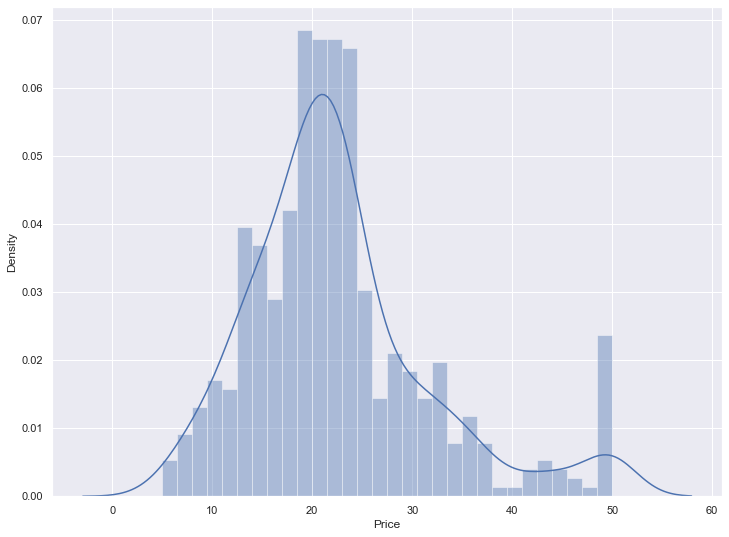

In [13]:
# fix the figure size
sns.set(rc = {'figure.figsize':(12, 9)})

# Create a Histogram that depicts the target values' Distribution
sns.distplot(boston['Price'], bins=30)
plt.show()

## We can see that Price values are *normally* distributed with few outliers

After that, we create a *correlation matrix* to determine the linear relationships between the variables. We can use the `corr()` function from the *pandas data frame library* to generate the correlation matrix. The correlation matrix will be shown using the `heatmap()` function from the *seaborn library*.

<AxesSubplot:>

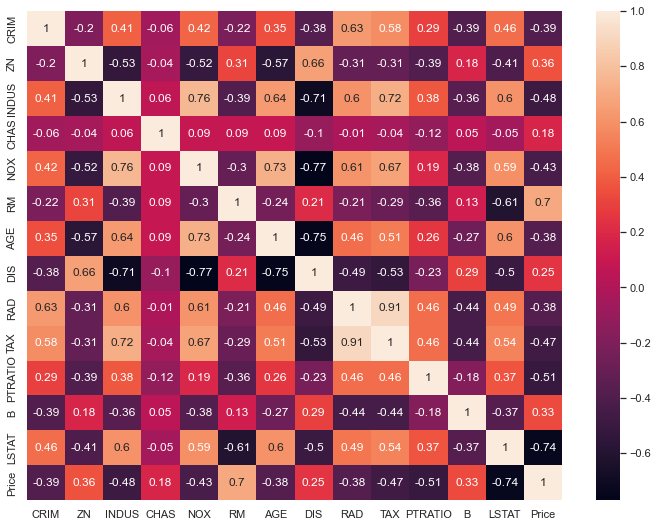

In [14]:
# for all columns, compute the pairwise-correlation
correlationMatrix = boston.corr().round(2)

# To plot the correlation Matrix, we use the heatmap function from seaborn.
sns.heatmap(data=correlationMatrix, annot=True) # annot = True => for printing values inside the Square

### The correlation coefficient might be anything between -1 and 1. If the value is near 1, it suggests that the two variables have a high positive association. The variables have a high negative association when it is close to -1.

### ***4. i. Remarks***
- We choose features that have a high correlation with our target variable, `Price`, to fit a linear regression model. The correlation matrix shows that `RM` has a high positive correlation = (0.7) with `Price`, whereas `LSTAT` has a strong negative correlation with `Price` = (-0.74).
- Checking for multi-co-linearity is a crucial consideration when choosing features for a linear regression model. The features `RAD` and `TAX` have a 0.91 correlation. These feature pairs have a high degree of correlation. When training the model, we should not use both of these features together. The same may be said for the features `DIS` and `AGE`, which exhibit a -0.75 correlation.
### We will use `RM` and `LSTAT` as our features based on the preceding observations. Let's look at how these characteristics change with Price using a scatter plot.

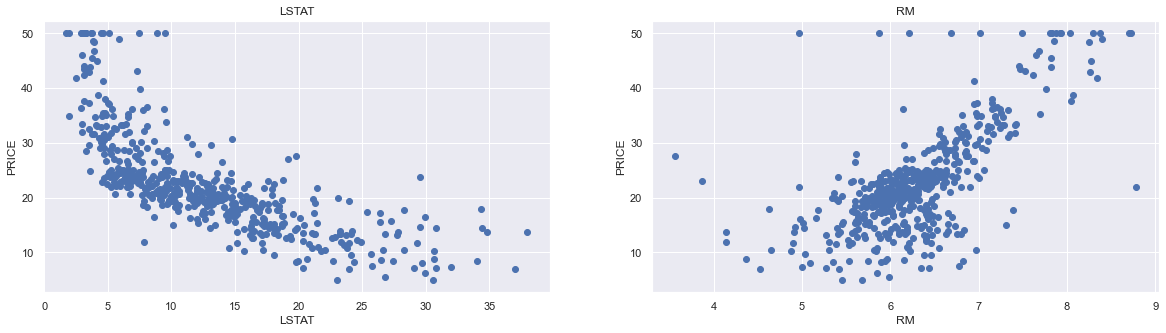

In [15]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['Price']

for j, column in enumerate(features):
    plt.subplot(1, len(features), j+1)
    x = boston[column]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('PRICE')

### ***4. ii. Remarks***
- The price increases linearly with the value of the `RM`. There aren't many outliers, and the data appears to be limited to 50.
- With a rise in `LSTAT`, prices tend to fall. However, it doesn't appear to be following a straight line.

### ***4. iii. Getting the data ready to train the model***
Using the *NumPy library*'s `np.c_()` function, we concatenate the `LSTAT` and `RM` columns.

In [16]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns=['LSTAT', 'RM'])
Y = boston['Price']

# 5. Modelling and Prediction

### ***5. i. Splitting the data into training and testing sets***
The data is then divided into training and testing sets. We use 80% of the samples to train the model and 20% to evaluate it. This is done to assess the model's performance with data that hasn't been seen before. To separate the data, we utilize the **scikit-learn library**'s `train_test_split()`  function. Finally, we printed the sizes of our training and test sets to ensure that the splitting went smoothly.

In [17]:
# train_test_split() => splits the training data and test data in 80% : 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) # to ensure consistency we assign any value to random_stats
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### ***5. ii. Training and Testing the Model***
We use **scikit-learn**'s `LinearRegression()` to train our model on both the training and test sets.

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

### ***Model Evaluation***
Model Evaluation calculates generalized accuracy for data that hasn't been seen before. It also determines whether or not our model is overfitting. Overfitted models perform well on test datasets but do not predict well on real-world datasets. Therefore, if there is no significant difference in the accuracy of the train and test sets, we can say that our model is ready for deployment.
The **Root Mean Square Error (`RMSE`)** and R2-score will be used to assess our model.

In [19]:
# Model Evaluation for the Training Set
predicted_y_train = regressor.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, predicted_y_train)))
r2 = r2_score(Y_train, predicted_y_train)
print('The Model\'s training set performance :-')
print(f'RMSE is : {rmse}')
print(f'R2 Score is : {r2}')
print('----------------------------------------')


# Model Evaluation for the Training Set
predicted_y_test = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, predicted_y_test)))
r2 = r2_score(Y_test, predicted_y_test)
print('The Model\'s testing set performance :-')
print(f'RMSE is : {rmse}')
print(f'R2 Score is : {r2}')
print('---------------------------------------')

The Model's training set performance :-
RMSE is : 5.637129335071195
R2 Score is : 0.6300745149331701
----------------------------------------
The Model's testing set performance :-
RMSE is : 5.137400784702911
R2 Score is : 0.6628996975186952
---------------------------------------


# As there isn’t much difference between the R2 score of the Training and Test set. The R2 score is close to 1. Therefore we can conclude that the model isn’t overfitted

# You can further refer to my [Linear Regression Project](https://github.com/v20131a4463/Supervised-Learning/blob/main/LinearRegression.ipynb) where I performed each and every step involved in `Linear Regression` in detailed for understanding what happens when you perform `Linear Regression` on a given data.